In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, r2_score, roc_curve, f1_score, confusion_matrix
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import scipy.stats as stats

## Introduction - Bank Marketing Campaign 

1.	Data from direct marketing campaigns of a Portuguese banking institution.
2.	Based on Phone calls.
3.	Often, more than one contact to the same client was made.
4.	Product (bank term deposit) would be ('yes') or not ('no') subscribed.
5.	Customer Acquisition (Product–bank term deposit)


## Objective

1.	Optimize the Telemarketing campaign and target the customers with a set of demographics that are likely to buy the fixed deposit.
2.	Target customers with suitable demographics (learned from our model)
3.	End goal: Higher and Efficient Customer Acquisition. 


## Exploratory Data Analysis

##### Missing Value % in all features

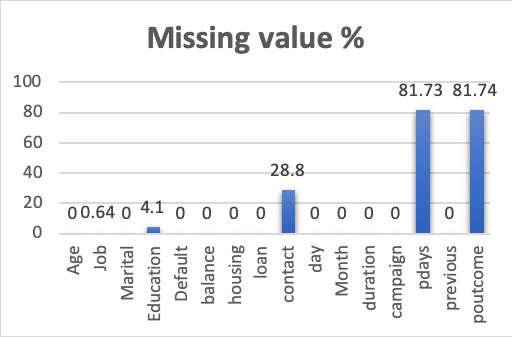

--> Features set can be viewed as: 
1. Bank client data - Includes: Age, Job, Marital, Education, Default, balance, housing, loan
2. Campaign data - contact, day, month, duration, campaign, pdays, previous, poucome.

Data type of all the features:
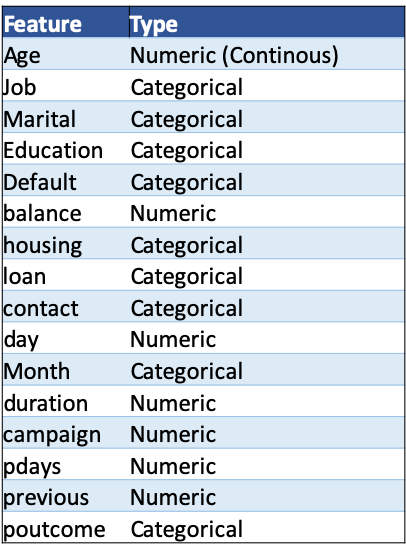

If week look at the correlation within the numerical features we get the follwimng:
Observe that the features pdays and 




In [2]:
banking_compaign = pd.read_csv('/Users/ankushpatil/Downloads/bank-full.csv')


In [3]:

#-----------Preprocessing----------------------------------------------------------------

#----------------------------- Label Encoding the month Feature-----------------------------
banking_compaign.loc[banking_compaign['month'] == 'jan', 'month'] = 1
banking_compaign.loc[banking_compaign['month'] == 'feb', 'month'] = 2
banking_compaign.loc[banking_compaign['month'] == 'mar', 'month'] = 3
banking_compaign.loc[banking_compaign['month'] == 'apr', 'month'] = 4
banking_compaign.loc[banking_compaign['month'] == 'may', 'month'] = 5
banking_compaign.loc[banking_compaign['month'] == 'jun', 'month'] = 6
banking_compaign.loc[banking_compaign['month'] == 'jul', 'month'] = 7
banking_compaign.loc[banking_compaign['month'] == 'aug', 'month'] = 8
banking_compaign.loc[banking_compaign['month'] == 'sep', 'month'] = 9
banking_compaign.loc[banking_compaign['month'] == 'oct', 'month'] = 10
banking_compaign.loc[banking_compaign['month'] == 'nov', 'month'] = 11
banking_compaign.loc[banking_compaign['month'] == 'dec', 'month'] = 12
banking_compaign.month.astype(int)


#--------------------pdays, previous and poutcome selecting only one-----------------------
banking_compaign.loc[(banking_compaign['pdays'] == -1), 'pdays'] = 0

banking_compaign.drop(['poutcome','previous','duration'], axis = 1)

#--------------------dropping duration feature---------------------



#banking_compaign.drop_duplicates()
#----------------- Drop customer values with 'unkown' job------------------
banking_compaign = banking_compaign[banking_compaign.job != 'unknown']
banking_compaign = banking_compaign[banking_compaign.education != 'unknown']
banking_compaign = banking_compaign[banking_compaign.contact != 'unknown']


#-----------------Label Encoding----------------------------
banking_compaign['housing'].replace(['yes'], 1, inplace=True)
banking_compaign['housing'].replace(['no'], 0, inplace=True)
banking_compaign.housing.astype(int)


banking_compaign['loan'].replace(['yes'], 1, inplace=True)
banking_compaign['loan'].replace(['no'], 0, inplace=True)
banking_compaign.loan.astype(int)


banking_compaign['default'].replace(['yes'], 1, inplace=True)
banking_compaign['default'].replace(['no'], 0, inplace=True)
banking_compaign.default.astype(int)

banking_compaign['y'].replace(['yes'], 1, inplace=True)
banking_compaign['y'].replace(['no'], 0, inplace=True)
banking_compaign.y.astype(int)

12657    0
12658    0
12659    0
12660    0
12661    0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 30907, dtype: int64

In [4]:
y = banking_compaign["y"]
X = banking_compaign.drop(['y'], axis = 1)
X = pd.get_dummies(X)

In [5]:
#-----------------------Feature Selection based on k best features------------------------------
info = {}
i_scores = mutual_info_classif(X, y)

for i, j in zip(X.columns, i_scores):
    info[i] = j

df = pd.DataFrame.from_dict(info, orient='index', columns=['I-Gain'])
df.sort_values(by=['I-Gain'], ascending=False, inplace=True)
df = df[df['I-Gain'] !=  0.0]
df = df.T
X_ = X[df.columns]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.33, random_state = 123)
print("Majority_class No is %0.2f and Minority_class Yes is %0.2f in original dataset" %(((1 - (y.sum()/len(y))) * 100) , (y.sum()/len(y)) *100))

Majority_class No is 85.40 and Minority_class Yes is 14.60 in original dataset


In [15]:
#--------------------------Ho

kNN = KNeighborsClassifier(n_neighbors=2)
tree = DecisionTreeClassifier(random_state= 123)
g_boost = GradientBoostingClassifier(n_estimators=100, random_state= 123)
gnb = GaussianNB()
models = [kNN, tree, gnb, g_boost]

for m in models:
    m.fit(X_train, y_train)
    y_pred  = m.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fp_rate = fp.sum() / (fp.sum() + tn.sum())
    tp_rate = tp.sum() / (tp.sum() + fn.sum())
    fn_rate = fn.sum() / (fn.sum() + tp.sum())
    tn_rate = tn.sum() / (fp.sum() + tn.sum())
    print("Model {}: ".format(type(m).__name__))
    print("Majority_class No is %0.2f and Minority_class Yes is %0.2f from predicted labels" %(((1 - (y_pred.sum()/len(y_pred))) * 100) , (y_pred.sum()/len(y_pred)) *100))
    print("Accuracy on Test Data: {0:.2f}".format(accuracy_score(y_test,y_pred)))
    print("FN: {:.2f}  TN: {:.2f} TP: {:.2f}  FP: {:.2f}\n".format(fn_rate, tn_rate,tp_rate,fp_rate))


Model KNeighborsClassifier: 
Majority_class No is 96.58 and Minority_class Yes is 3.42 from predicted labels
Accuracy on Test Data: 0.84
FN: 0.91  TN: 0.97 TP: 0.09  FP: 0.03

Model DecisionTreeClassifier: 
Majority_class No is 89.49 and Minority_class Yes is 10.51 from predicted labels
Accuracy on Test Data: 0.84
FN: 0.70  TN: 0.93 TP: 0.30  FP: 0.07

Model GaussianNB: 
Majority_class No is 86.33 and Minority_class Yes is 13.67 from predicted labels
Accuracy on Test Data: 0.80
FN: 0.72  TN: 0.89 TP: 0.28  FP: 0.11

Model GradientBoostingClassifier: 
Majority_class No is 95.45 and Minority_class Yes is 4.55 from predicted labels
Accuracy on Test Data: 0.86
FN: 0.82  TN: 0.98 TP: 0.18  FP: 0.02



In [16]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import  make_scorer
from sklearn.metrics import accuracy_score as accuracy

def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]

scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [kNN, tree, gnb, g_boost]
folds = 10
v = 0
for m in models:
    cv_results = cross_validate(m, X, y, cv=folds, scoring=scoring, return_train_score=False,verbose=v, n_jobs=-1)
    fp_rate = cv_results['test_fp'].sum() / (cv_results['test_fp'].sum() + cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum() / (cv_results['test_tp'].sum() + cv_results['test_fn'].sum())
    tn_rate = cv_results['test_tn'].sum() / (cv_results['test_tn'].sum() + cv_results['test_fp'].sum())
    fn_rate = cv_results['test_fn'].sum() / (cv_results['test_fn'].sum() + cv_results['test_tp'].sum())
    print("{} x CV {:22}  FN: {:.2f} TN: {:.2f}  TP: {:.2f} FP: {:.2f} ".format(folds, type(m).__name__, fn_rate, tn_rate, tp_rate, fp_rate))

10 x CV KNeighborsClassifier    FN: 0.91 TN: 0.96  TP: 0.09 FP: 0.04 
10 x CV DecisionTreeClassifier  FN: 0.81 TN: 0.32  TP: 0.19 FP: 0.68 
10 x CV GaussianNB              FN: 0.71 TN: 0.81  TP: 0.29 FP: 0.19 
10 x CV GradientBoostingClassifier  FN: 0.88 TN: 0.80  TP: 0.12 FP: 0.20 


In [17]:

from imblearn.under_sampling import RandomUnderSampler
renn = RandomUnderSampler(random_state=2)
X_train_res, y_train_res = renn.fit_sample(X_train, y_train.ravel())
print("Before UnderSampling, counts of label '1': {}".format(y_train.sum()))
print("Before UnderSampling, counts of label '0': {} \n".format(len(y_train) - y_train.sum()))
print("After UnderSampling, counts of label '1': {}".format(y_train_res.sum()))
print("After UnderSampling, counts of label '0': {} \n".format(len(y_train_res) - y_train_res.sum()))
models = [kNN, tree, gnb, g_boost]
for m in models:
    y_pred_res  = m.fit(X_train_res, y_train_res).predict(X_test)
    positive = 100 * (y_pred_res.sum()/len(y_pred_res))
    negative = 100 * ( 1- (y_pred_res.sum()/len(y_pred_res)))
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred_res).ravel()
    fp_rate = fp.sum() / (fp.sum() + tn.sum())
    tp_rate = tp.sum() / (tp.sum() + fn.sum())
    fn_rate = fn.sum() / (fn.sum() + tp.sum())
    tn_rate = tn.sum() / (fp.sum() + tn.sum())
    print("{}:".format(type(m).__name__))
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test,y_pred_res)))
    print("Minority class[1] is {:.2f}% and Majority class[0] is {:.2f}% ".format(positive,negative))
    print("FN: {:.2f}  TN: {:.2f} TP: {:.2f}  FP: {:.2f}\n".format(fn_rate, tn_rate,tp_rate,fp_rate))

Before UnderSampling, counts of label '1': 3017
Before UnderSampling, counts of label '0': 17690 

After UnderSampling, counts of label '1': 3017
After UnderSampling, counts of label '0': 3017 

KNeighborsClassifier:
Accuracy: 0.73
Minority class[1] is 22.49% and Majority class[0] is 77.51% 
FN: 0.66  TN: 0.79 TP: 0.34  FP: 0.21

DecisionTreeClassifier:
Accuracy: 0.69
Minority class[1] is 34.07% and Majority class[0] is 65.93% 
FN: 0.38  TN: 0.71 TP: 0.62  FP: 0.29

GaussianNB:
Accuracy: 0.61
Minority class[1] is 42.74% and Majority class[0] is 57.26% 
FN: 0.36  TN: 0.61 TP: 0.64  FP: 0.39

GradientBoostingClassifier:
Accuracy: 0.79
Minority class[1] is 25.14% and Majority class[0] is 74.86% 
FN: 0.36  TN: 0.81 TP: 0.64  FP: 0.19



In [28]:
banking_compaign = pd.read_csv('/Users/ankushpatil/Downloads/bank-full.csv')
#--------Probability Calculation ----------#

X_yes_df = banking_compaign[banking_compaign['y']=='yes']
X_no_df = banking_compaign[banking_compaign['y']=='no']

#y_yes_df = parent_dataset['y'][(parent_dataset['y'])=='yes']
y_yes_df  = X_yes_df.pop('y')

y_yes_df.replace(['yes'], 1, inplace=True)

#Numerical_encoding = {'yes':1, 'no':0}
#y_yes_df = y_yes_df.apply(lambda x: Numerical_encoding[x])
#X_yes_df = X_yes_df.drop(['y', 'duration'], axis = 1)
X_yes_df = pd.get_dummies(X_yes_df)

#print(len(X_yes_df['balance type_Zero Balance']))
#print(len(y_yes_df))
X_no_df = X_no_df.drop(['y'], axis = 1)
X_no_df = pd.get_dummies(X_no_df)
#X_no_df = X_no_df.drop(['y','duration'], axis = 1)



#----------Finding which column is least common among the X_yes_df and X dataframes----#
big_list  = X.columns

small_list = X_yes_df.columns

common_list = []
uncommon_list = []

for i in big_list:
    if i in small_list:
        common_list.append(i)
    else:
        uncommon_list.append(i)
print(common_list)
print(uncommon_list)


#----------------------------------------------------------------
##------- logistic regression' -----#
banking_compaign = pd.read_csv('/Users/ankushpatil/Downloads/bank-full.csv')



X = banking_compaign.drop(['y'], axis = 1)
X = pd.get_dummies(X)
#X = X.drop(['months_passed_29'], axis = 1)


y = banking_compaign["y"]
y.replace(['yes'], 1, inplace=True)
y.replace(['no'], 0, inplace=True)
y.astype(int)

from sklearn.model_selection import train_test_split #or sklearn.preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

proabability_prediction = classifier.predict_proba(X_yes_df)
print("yes")
print(proabability_prediction[:,0])
#-----------Designing Probability column for parent_dataset with y = 'Yes'-------#
banking_compaign_yes = banking_compaign[banking_compaign['y'] == 'yes']
banking_compaign_yes['Probability'] = list(proabability_prediction[:,0])

#-----------Designing Probability column for parent_dataset with y = 'no'-------#
X = banking_compaign.drop(['y'], axis = 1)
X = pd.get_dummies(X)


y = banking_compaign["y"]
y.replace(['yes'], 1, inplace=True)
y.replace(['no'], 0, inplace=True)
y.astype(int)


from sklearn.model_selection import train_test_split #or sklearn.preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

proabability_prediction = classifier.predict_proba(X_no_df)
banking_compaign_no = banking_compaign[banking_compaign['y'] == 'no']
proabability_prediction = classifier.predict_proba(X_no_df)
banking_compaign_no['Probability'] = list(proabability_prediction[:,0])

optimised_dataframe = banking_compaign_yes.append(banking_compaign_no)



optimised_dataframe["balance_"] = 'no data'
optimised_dataframe.loc[optimised_dataframe['balance']<= 0,'balance_'] = 'no balance'
optimised_dataframe.loc[(optimised_dataframe['balance'] >= 1) & (optimised_dataframe['balance'] <= 1000),'balance_'] = "low balance"
optimised_dataframe.loc[(optimised_dataframe['balance'] >= 1001) & (optimised_dataframe['balance'] <= 5000),'balance_'] = "average balance"
optimised_dataframe.loc[(optimised_dataframe['balance'] > 5000),'balance_'] = "high balance"


bins = [17,30,40,50,60,95]
age_groups = ['less than 30','30-40','40-50','50-60','60+']
optimised_dataframe['age'] = pd.cut(optimised_dataframe['age'], bins, labels = age_groups)


optimised_dataframe.to_csv("/Users/ankushpatil/Downloads/1.csv")


/Users/ankushpatil/Library/Python/3.7/lib/python/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
[]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


yes
[0.73363438 0.18952302 0.41626101 ... 0.35239543 0.7734613  0.02230242]


/Users/ankushpatil/Library/Python/3.7/lib/python/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ankushpatil/Library/Python/3.7/lib/python/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise 